In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
import itertools

In [26]:
def plot_confmat(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    """
    The following function plots the respective confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
                                  

In [27]:
bankdata = pd.read_csv("bank-additional-full.csv", delimiter=";")
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
y_Data = bankdata["y"]
x_Data = bankdata.drop(["y","duration"], axis=1)
x_Data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [30]:
col = x_Data.select_dtypes("object").columns
print(col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [31]:
x_Data[col]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent


In [32]:
x_Data = pd.get_dummies(x_Data, columns = col)
x_Data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [35]:
clf1 = ExtraTreesClassifier(n_estimators = 100)
Kfold = StratifiedKFold(n_splits=10)
score = cross_validate(clf1, x_Data, y_Data, cv = Kfold)

print('Average accuracy:',np.mean(score['test_score']),"(+/-)",2*np.std(score['test_score']))

Average accuracy: 0.5267717353842185 (+/-) 0.504893970526509


[[36539     9]
 [  234  4406]]
Confusion matrix, without normalization


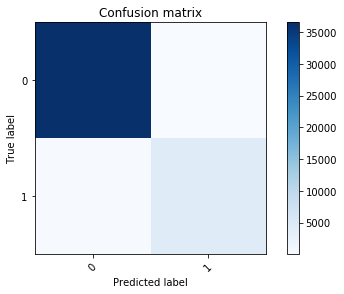

In [36]:
# Compute confusion matrix
clf1.fit(x_Data,y_Data)
y_pred = clf1.predict(x_Data)
cnf_matrix = confusion_matrix(y_Data, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_Data))), normalize = False,
                      title='Confusion matrix')

[ 0  1  7  8  2 61  4 36 38  6  9 22 28 31  5 56 55 23 18 57 41 58 39 54
 50 30  3 21 10 27 60 13 16 14 25 59 43 42 32 52 34 26 33 49 15 17 11 19
 44 48 12 47 45 51 53 20 37 40 46 24 29 35]
Feature ranking:
1. age (0.155845)
2. campaign (0.105204)
3. euribor3m (0.094634)
4. nr.employed (0.045354)
5. pdays (0.034326)
6. poutcome_success (0.030363)
7. emp.var.rate (0.023407)
8. housing_no (0.020844)
9. housing_yes (0.020781)
10. cons.conf.idx (0.017311)
11. job_admin. (0.017284)
12. marital_married (0.016927)
13. education_high.school (0.016485)
14. education_university.degree (0.016180)
15. cons.price.idx (0.015241)
16. day_of_week_thu (0.014986)
17. day_of_week_mon (0.014829)
18. marital_single (0.014540)
19. job_technician (0.014442)
20. day_of_week_tue (0.014130)
21. loan_yes (0.013897)
22. day_of_week_wed (0.013880)
23. loan_no (0.013829)
24. day_of_week_fri (0.013790)
25. month_may (0.012280)
26. education_professional.course (0.011858)
27. previous (0.011614)
28. marital_divorced 

(0, 0.16893340662801293)

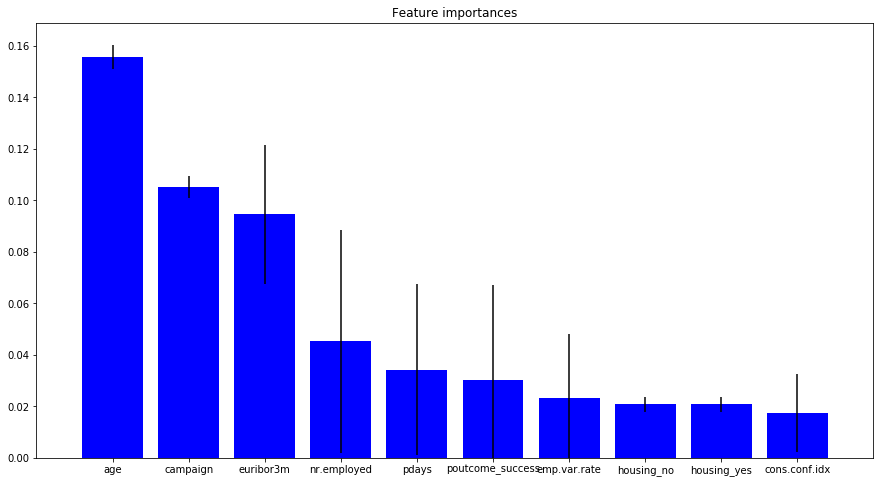

In [24]:

n_features = len(XData.columns)
importances = clf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf1.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, XData.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="b", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(XData.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

#plt.savefig("importances.png",bbox_inches='tight')
#plt.savefig("importances.pdf",bbox_inches='tight')